# Lab Exercise on Data Exploration and Preparation Summer 2025 ITCS 6162
## Your Name:Noor Mohammed Vempalli
# Student Id:801428577

### Using the Boston Building and Property Violations Dataset showing a variety of code violations, perform exploratory data analysis, data wrangling and document what you learn. Execute the code sequentially starting with library imports and continue wherever code is already entered. Follow instructions and add code or text where indicated (Question 1, Question 2, etc.). Feel free to add other code. Turn in your notebook "printed" as a PDF but be sure to Download the .ipynb version as well for continuing work or for saving when complete.
### To learn more about the metadata visit: <a href="https://data.boston.gov/dataset/building-and-property-violations1/resource/800a2663-1d6a-46e7-9356-bedb70f5332c">Boston Building and Property Violations</a><br>


### Review the notebook at <a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.14-Visualization-With-Seaborn.ipynb#scrollTo=ahx_HYUqYc9T">Python Data Science Handbook Visualization With Seaborn</a> to assist with the visualizations. You can also use AI to assist with the code, but make sure you understand every line of code!

In [1]:
# import statements
import pandas as pd
import seaborn as sns

In [2]:
# create a variable to store the url for the data ingest
urltodata = "https://raw.githubusercontent.com/plthomps/UNCC-Data-Mining-Summer-2025/refs/heads/main/tmpdiixs5mq.csv"

In [3]:
# read the data using the url into a pandas dataframe
bostondata = pd.read_csv(urltodata)

In [4]:
# examine the first few rows of data
bostondata.head()

,case_no,ap_case_defn_key,status_dttm,status,code,value,description,violation_stno,violation_sthigh,violation_street,...,ward,contact_addr1,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location
0,V91983,1013,NaN,Closed,121.2,NaN,Unsafe and Dangerous,302,NaN,Sumner,...,01,302 Sumner St,NaN,East Boston,MA,02128,132380.0,42.367678,-71.036580,"(42.367678491254956, -71.0365803778755)"
1,V846131,1013,2025-07-11 09:16:34,Open,1001.3.2,NaN,Testing & Certification,762A,762,Tremont,...,09,762 Tremont St,NaN,Boston,MA,02118,170469.0,42.339590,-71.079164,"(42.33958960011894, -71.07916364253342)"
2,V846111,1013,2025-07-11 08:37:15,Open,105.1,NaN,Failure to Obtain Permit,5,NaN,Saint John,...,19,619 Centre St,NaN,Jamaica Plain,MA,02130,121254.0,42.313940,-71.113471,"(42.31393959798791, -71.11347067037214)"
3,V845939,1013,2025-07-10 09:50:12,Open,116,NaN,Unsafe Structures,6,8,Mount Calvary,...,18,23 Dawson,NaN,ROSLINDALE,MA,02131,167882.0,42.280828,-71.113495,"(42.28082794162585, -71.11349485918892)"
4,V845936,1013,2025-07-10 09:46:04,Open,116,NaN,Unsafe Structures,6,8,Mount Calvary,...,18,"18 Mt Calvary Road, Unit 9",NaN,ROSLINDALE,MA,02131,167882.0,42.280828,-71.113495,"(42.28082794162585, -71.11349485918892)"


## Question 1 Part A: using code, document the nulls in the dataset.

In [5]:
#Question 1 Part A using code, show the nulls in the dataframe
null_counts = bostondata.isnull().sum()
# Display percentage of nulls per column
null_percentage = (bostondata.isnull().mean()*100).round (2)
# Combine into a single DataFrame for documentation
null_report = pd.DataFrame ( {
'Null Count': null_counts,
'Null Percentage (%)': null_percentage
})
# Show columns with at least one null value
null_report = null_report[null_report[ 'Null Count'] > 0]
print("Null Values:")
print (null_report)

Null Values:
                  Null Count  Null Percentage (%)
status_dttm                1                 0.01
value                  16782               100.00
description              247                 1.47
violation_sthigh       12534                74.69
violation_suffix         144                 0.86
violation_zip              2                 0.01
contact_addr1              5                 0.03
contact_addr2          13765                82.02
contact_city               2                 0.01
contact_state              2                 0.01
contact_zip               13                 0.08
sam_id                    92                 0.55
latitude                  93                 0.55
longitude                 93                 0.55
location                  93                 0.55


## Question 1 Part B: How would you handle the nulls? In the markdown cell below, document several ways to handle the nulls in the dataset. You are not required to enter code (optional), only describe approaches to handling the nulls.

## Question 1 Part B Answer:


In [19]:
#lets add a column - month - and make it numeric
# we will use slice
bostondata['month'] = bostondata['status_dttm'].str.slice(5,7)
#one of the values is not null, but has spaces
bostondata["month"] = bostondata["month"].replace({"": "09"})
# change the column type from object to int
bostondata['month'] = pd.to_numeric(bostondata['month'])
#lets see info on bostondata
bostondata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16782 entries, 0 to 16781
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   case_no           16782 non-null  object 
 1   ap_case_defn_key  16782 non-null  int64  
 2   status_dttm       16781 non-null  object 
 3   status            16782 non-null  object 
 4   code              16782 non-null  object 
 5   value             0 non-null      float64
 6   description       16535 non-null  object 
 7   violation_stno    16782 non-null  object 
 8   violation_sthigh  4248 non-null   object 
 9   violation_street  16782 non-null  object 
 10  violation_suffix  16638 non-null  object 
 11  violation_city    16782 non-null  object 
 12  violation_state   16782 non-null  object 
 13  violation_zip     16780 non-null  object 
 14  ward              16782 non-null  object 
 15  contact_addr1     16777 non-null  object 
 16  contact_addr2     3017 non-null   object

## Question 2: Get the value counts (number of occurrences of unique values) for the records by our new month column

In [7]:
# Question 2 code: lets get the value counts for our new column
bostondata['month'].value_counts()

,count
month,
3.0,1721
9.0,1649
5.0,1594
6.0,1504
4.0,1501
7.0,1421
2.0,1404
10.0,1358
8.0,1283


## Question 3. Using the describe function, get statistical information on the numerical features (columns).

In [8]:
#Question 3 code: statistical information
bostondata.describe()

,ap_case_defn_key,value,sam_id,latitude,longitude,month
count,16782.0,0.0,16690.000000,16689.000000,16689.000000,16781.000000
mean,1013.0,NaN,98647.667645,42.260501,-71.101029,6.297956
std,0.0,NaN,74503.376587,0.719364,0.231153,3.300704
min,1013.0,NaN,0.000000,34.244387,-73.651391,1.000000
25%,1013.0,NaN,48360.250000,42.295670,-71.099841,3.000000
50%,1013.0,NaN,92897.000000,42.325629,-71.075021,6.000000
75%,1013.0,NaN,132511.750000,42.353488,-71.058570,9.000000
max,1013.0,NaN,460046.000000,42.392699,-70.995970,12.000000


## Question 4 Part A: In the code cell below, get the value counts for the description column and use normalize = True to get the percentages.

In [9]:
#Question 4 Part A Code: Value Counts
bostondata['description'].value_counts(normalize=True)

,proportion
description,
Failure to Obtain Permit,0.245661
Unsafe and Dangerous,0.219171
Maintenance,0.098034
Testing & Certification,0.054067
Unsafe Structures,0.042213
...,...
Grounding electrode conduction,0.000060
Removal/Making Structure Safe,0.000060
Use & Occupancy,0.000060


## Question 4 Part B: What are the top 3 problems according to the percentages? Answer using the markdown cell below.

## Question 4 Part B Answer:



## Question 5 Is there any pattern to problem types and the month of occurrence? Create a visualization to learn more in the code cell below.

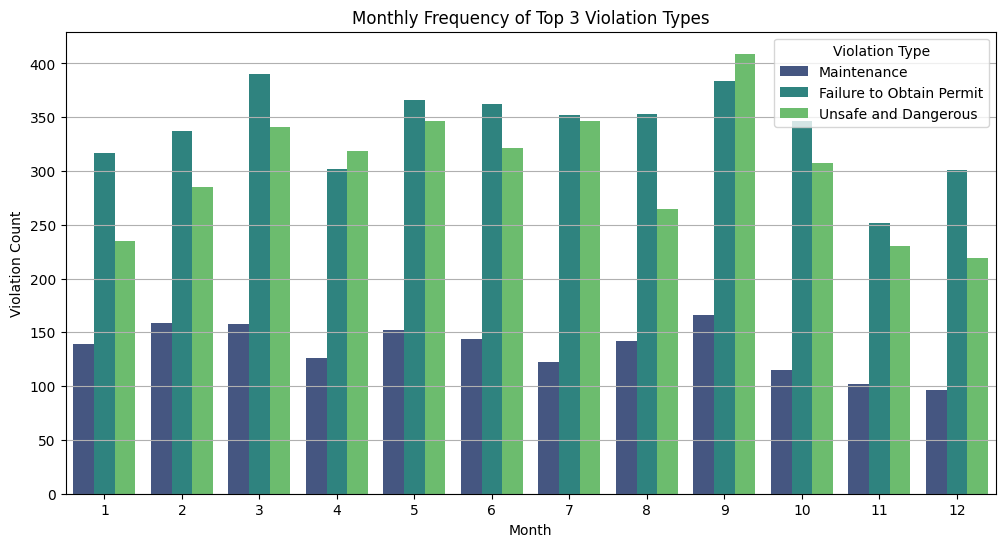

In [10]:
#Question 5 Code (run for visualization)
import seaborn as sns
import matplotlib.pyplot as plt
highlighted_violations = ['Failure to Obtain Permit', 'Unsafe and Dangerous', 'Maintenance']
filtered_data = bostondata[bostondata['description'].isin(highlighted_violations)]
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='month', hue='description', palette='viridis')
plt.title('Monthly Frequency of Top 3 Violation Types')
plt.xlabel('Month')
plt.ylabel('Violation Count')
plt.xticks(ticks=range(12), labels=[str(i + 1) for i in range(12)])
plt.grid(axis='y')
plt.legend(title='Violation Type')
plt.show()


## Question 6 What did you learn about any patterns by month? Place your answer below in the markdown cell.

## Question 6 Answer:

## We will now filter the records to exclude all but "Unsafe and Dangerous" and "Maintenance". Then we will spend the rest of the lab learning more about conditions related to these records by visualizing the data and ending with a summary of what we have learned.

In [11]:
#create a new pandas dataframe with the filtered data
#bostondata_filtered = bostondata.query("description == 'Unsafe and Dangerous' |  description == 'Maintenance' | description = 'Failure to Obtain Permit'")
bostondata_filtered = bostondata[(bostondata.description == 'Unsafe and Dangerous') | (bostondata.description == 'Maintenance')]

In [12]:
bostondata_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5245 entries, 0 to 16777
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   case_no           5245 non-null   object 
 1   ap_case_defn_key  5245 non-null   int64  
 2   status_dttm       5244 non-null   object 
 3   status            5245 non-null   object 
 4   code              5245 non-null   object 
 5   value             0 non-null      float64
 6   description       5245 non-null   object 
 7   violation_stno    5245 non-null   object 
 8   violation_sthigh  1340 non-null   object 
 9   violation_street  5245 non-null   object 
 10  violation_suffix  5213 non-null   object 
 11  violation_city    5245 non-null   object 
 12  violation_state   5245 non-null   object 
 13  violation_zip     5245 non-null   object 
 14  ward              5245 non-null   object 
 15  contact_addr1     5244 non-null   object 
 16  contact_addr2     1032 non-null   object 
 17 

## Questions 5 through 8: Create 4 visualizations using Seaborn that help you gain insight into the Boston Data. Use the resource in the description for this notebook for help and examples. You can also use Seaborn documentation.

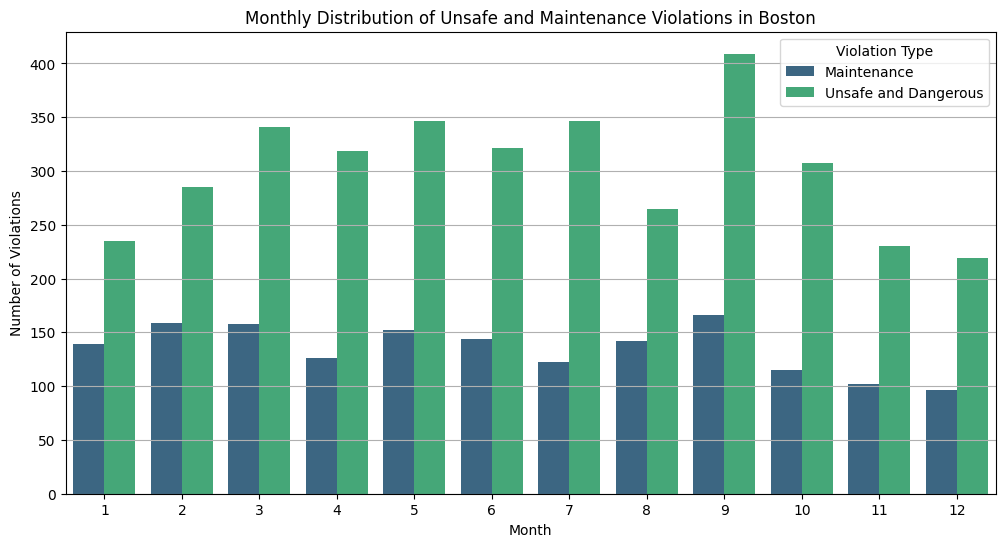

In [13]:
# Question 5 Visualization
plt.figure(figsize=(12, 6))
sns.countplot(data=bostondata_filtered, x='month', hue='description', palette='viridis')
plt.title('Monthly Distribution of Unsafe and Maintenance Violations in Boston')
plt.xlabel('Month')
plt.ylabel('Number of Violations')
plt.xticks(ticks=range(12), labels=[str(i + 1) for i in range(12)])
plt.legend(title='Violation Type')
plt.grid(axis='y')
plt.show()


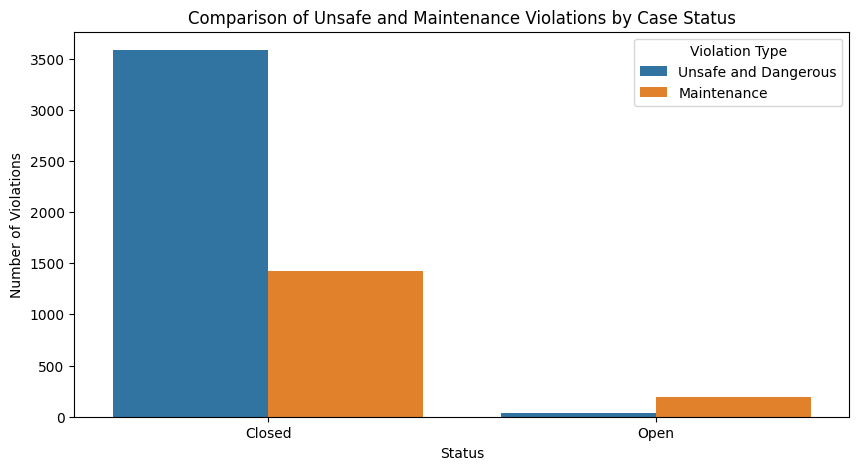

In [14]:
# Question 6 Visualization
plt.figure(figsize=(10, 5))
sns.countplot(data=bostondata_filtered, x='status', hue='description')
plt.title('Comparison of Unsafe and Maintenance Violations by Case Status')
plt.xlabel('Status')
plt.ylabel('Number of Violations')
plt.legend(title='Violation Type')
plt.show()

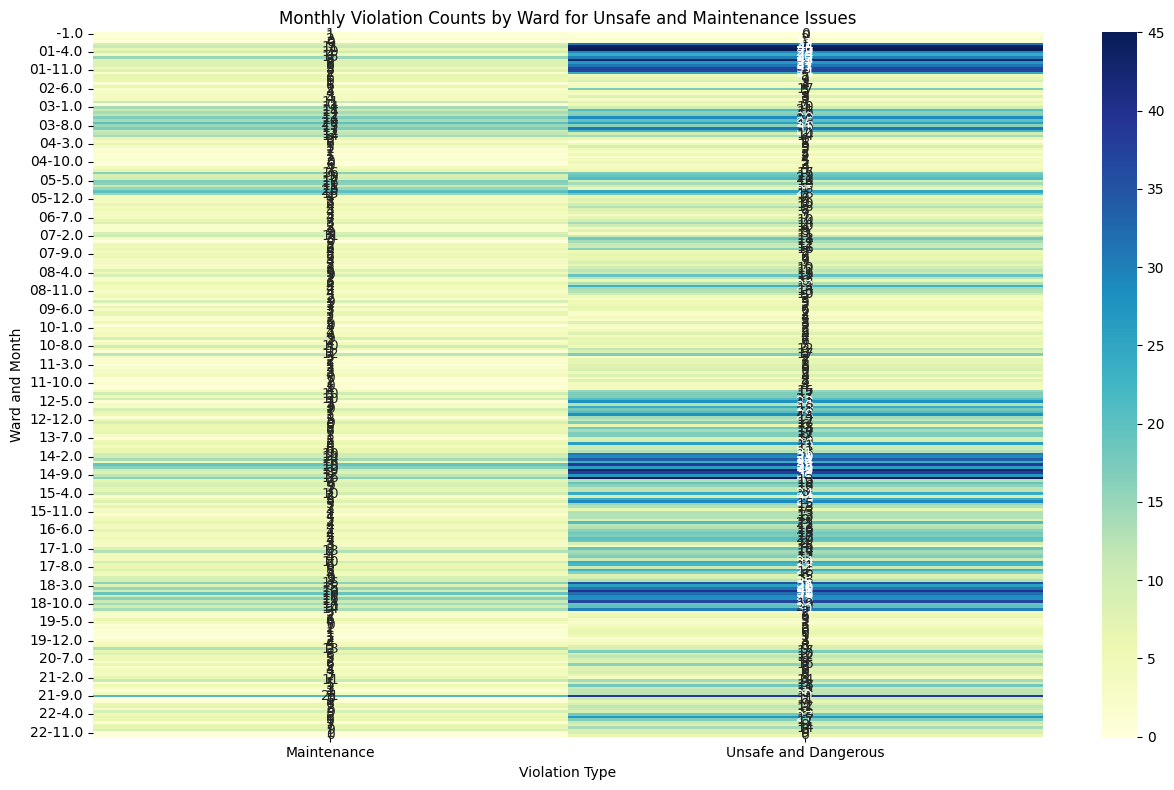

In [15]:
# Question 7 Visualization
# Prepare data for heatmap: Count of violations by ward, month, and description
heatmap_data = bostondata_filtered.groupby(['ward', 'month', 'description']).size().unstack(fill_value=0)
plt.figure(figsize=(13, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Monthly Violation Counts by Ward for Unsafe and Maintenance Issues')
plt.xlabel('Violation Type')
plt.ylabel('Ward and Month')
plt.tight_layout()


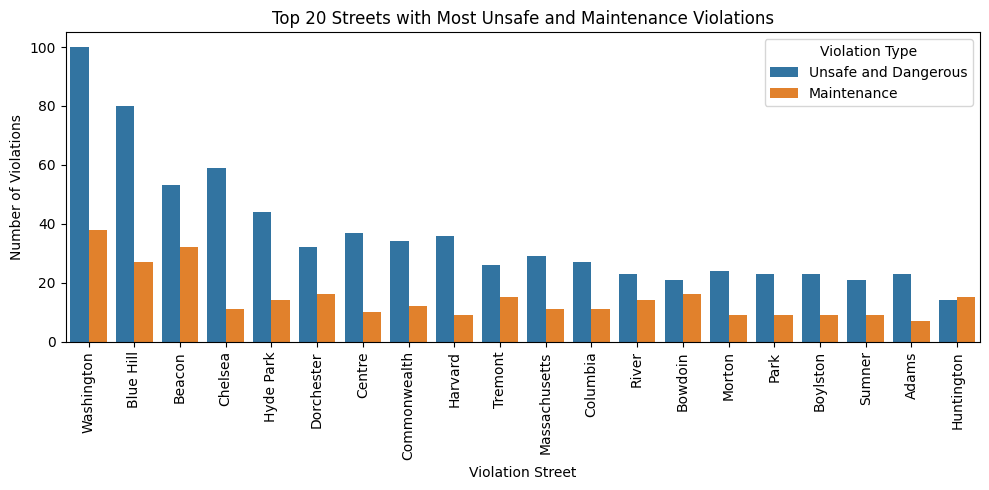

In [16]:
# Question 8 Visualization
# Get top 20 streets with the most violations
top_streets = bostondata_filtered['violation_street'].value_counts().nlargest(20).index
# Filter data to only include those streets
bostondata_filtered_top_streets = bostondata_filtered[bostondata_filtered['violation_street'].isin(top_streets)]
plt.figure(figsize=(10, 5))
sns.countplot(data=bostondata_filtered_top_streets, x='violation_street', hue='description', order=top_streets)
plt.title('Top 20 Streets with Most Unsafe and Maintenance Violations')
plt.xlabel('Violation Street')
plt.ylabel('Number of Violations')
plt.xticks(rotation=90)
plt.legend(title='Violation Type')
plt.tight_layout()
plt.show()


## Question 9:  What have you learned from Exploratory Data Analysis?


## Question 9 Answer:Missing Data:
The dataset has a lot of missing values. For example, the value column is completely empty and can likely be removed. Other columns like contact_addr2 and violation_sthigh are missing data in more than 70% of the rows, so they may need to be dropped or carefully handled. For columns with just a few missing values, we can either remove those rows or fill them in using simple methods like the average or most common value.

Monthly Trends:
There are clear seasonal patterns in the data. Violations like "Failure to Obtain Permit" and "Unsafe and Dangerous" happen more often during summer months. On the other hand, "Maintenance" issues seem to occur steadily throughout the year.

Focused Trends:
When we look specifically at "Unsafe and Dangerous" and "Maintenance" violations, the seasonal trend becomes clearer. "Unsafe and Dangerous" violations increase during warmer months, while "Maintenance" issues stay about the same all year.

Violation Status:
Many of the "Unsafe and Dangerous" and "Maintenance" cases are still marked as "Open," which means they haven’t been fixed yet.

